# Basic CNN Model using Keras for Eye disease Prediction

### Author - Shaurya Singh Srinet and Charvi Jain

### Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import cv2
import tensorflow as tf 
from tensorflow import keras
from pathlib import Path
import PIL
import os

### Reading Input from local Machine

In [4]:
glaucoma = Path(r"C:\Users\Charvi Jain\Downloads\dataset\glaucoma")
cataract = Path(r"C:\Users\Charvi Jain\Downloads\dataset\cataract")
normal = Path(r"C:\Users\Charvi Jain\Downloads\dataset\normal")
diabetic_retinopathy = Path(r"C:\Users\Charvi Jain\Downloads\dataset\diabetic_retinopathy")

### Creating a dataframe with the file path and the labels


In [5]:
disease_type = [glaucoma, cataract,normal,diabetic_retinopathy]
df = pd.DataFrame()
from tqdm import tqdm
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc= str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)],'disease_type': [disease_type.index(types)]})], ignore_index=True)

C:\Users\Charvi Jain\Downloads\dataset\normal: 100%|██████████| 1074/1074 [00:00<00:00, 3096.32it/s]
C:\Users\Charvi Jain\Downloads\dataset\diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 3241.20it/s]


In [6]:
df

,image,disease_type
0,C:\Users\Charvi Jain\Downloads\dataset\glaucom...,0
1,C:\Users\Charvi Jain\Downloads\dataset\glaucom...,0
2,C:\Users\Charvi Jain\Downloads\dataset\glaucom...,0
3,C:\Users\Charvi Jain\Downloads\dataset\glaucom...,0
4,C:\Users\Charvi Jain\Downloads\dataset\glaucom...,0
...,...,...
4212,C:\Users\Charvi Jain\Downloads\dataset\diabeti...,3
4213,C:\Users\Charvi Jain\Downloads\dataset\diabeti...,3
4214,C:\Users\Charvi Jain\Downloads\dataset\diabeti...,3
4215,C:\Users\Charvi Jain\Downloads\dataset\diabeti...,3


In [7]:
df.disease_type.value_counts()

disease_type
3    1098
2    1074
1    1038
0    1007
Name: count, dtype: int64

### Defining function to plot sample images


In [8]:
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()

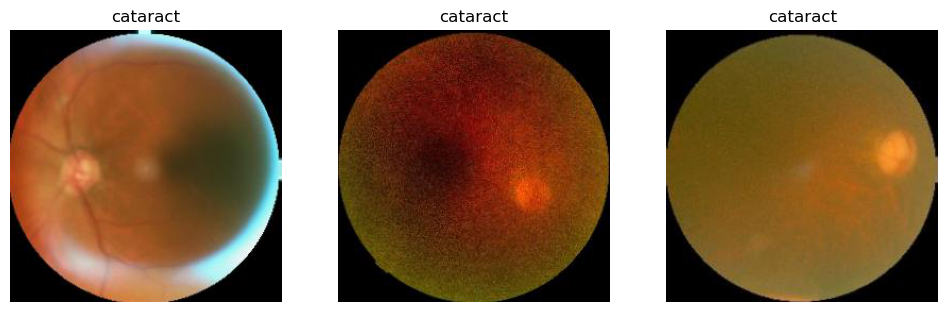

In [9]:
plot_image(1)

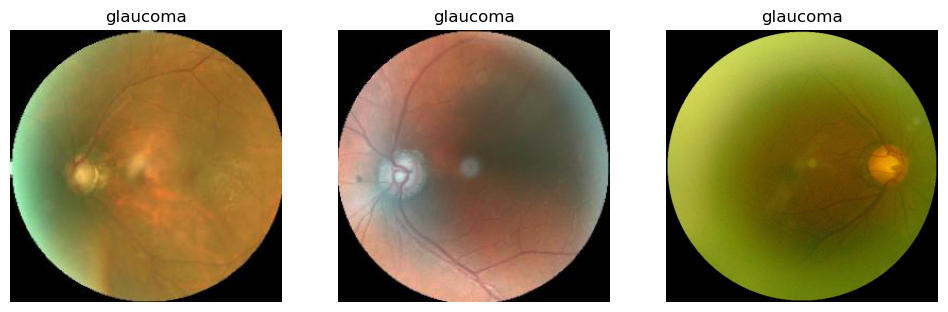

In [10]:
plot_image(0)

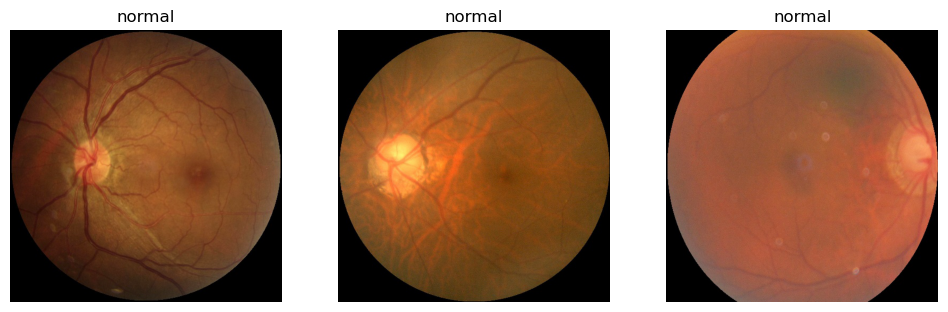

In [11]:
plot_image(2)

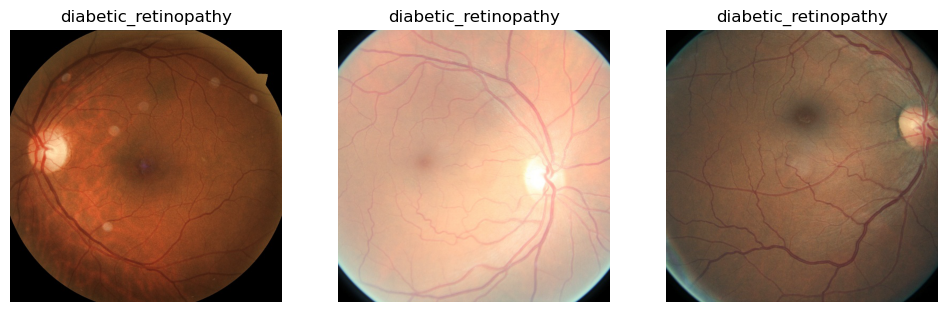

In [12]:
plot_image(3)

### Mapping the labels to the type of eye disease


In [13]:
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})

### Checking the label count to verify if it has been mapped

In [14]:
df.disease_type.value_counts()

disease_type
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64

### Randomising the dataset

In [15]:
df1 = df.sample(frac=1).reset_index(drop=True)

### Creating a countplot of the disease type


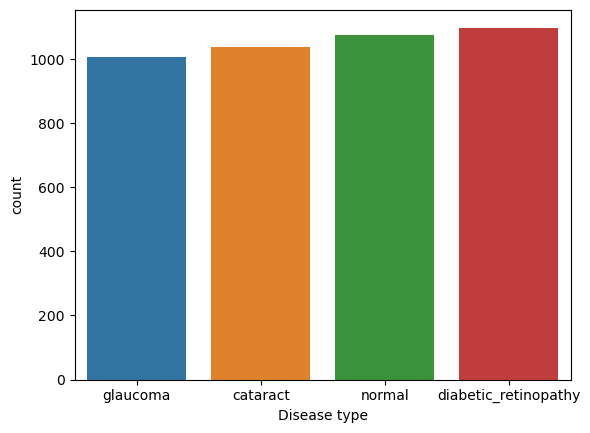

In [16]:
sns.countplot(x = 'disease_type', data = df1)
plt.xlabel("Disease type")
plt.show()


### Importing tensorflow libraries

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

### Augumentating the images

In [18]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

### Creating the train data


In [19]:
train_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3374 validated image filenames belonging to 4 classes.


### Creating the validation data


In [20]:
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

Found 843 validated image filenames belonging to 4 classes.


In [21]:
labels=[key for key in train_data.class_indices]
num_classes = len(disease_type)

model = keras.Sequential([ 
    layers.Rescaling(1./255, input_shape=(224,224, 3)), 
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Flatten(), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(num_classes,activation='softmax') 
]) 

In [22]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

### Fitting the model


In [23]:
his = model.fit( 
  train_data,
    validation_data=valid_data, 
  epochs=15 
)

Epoch 1/15
106/106 [==============================] - 104s 971ms/step - loss: 1.0022 - accuracy: 0.5622 - val_loss: 0.6592 - val_accuracy: 0.7224
Epoch 2/15
106/106 [==============================] - 68s 638ms/step - loss: 0.6304 - accuracy: 0.7365 - val_loss: 0.5043 - val_accuracy: 0.8055
Epoch 3/15
106/106 [==============================] - 66s 624ms/step - loss: 0.5256 - accuracy: 0.7937 - val_loss: 0.4982 - val_accuracy: 0.7948
Epoch 4/15
106/106 [==============================] - 74s 694ms/step - loss: 0.4539 - accuracy: 0.8171 - val_loss: 0.5853 - val_accuracy: 0.7485
Epoch 5/15
106/106 [==============================] - 78s 728ms/step - loss: 0.4260 - accuracy: 0.8278 - val_loss: 0.5767 - val_accuracy: 0.7888
Epoch 6/15
106/106 [==============================] - 70s 662ms/step - loss: 0.3963 - accuracy: 0.8423 - val_loss: 0.4533 - val_accuracy: 0.8470
Epoch 7/15
106/106 [==============================] - 69s 652ms/step - loss: 0.3465 - accuracy: 0.8551 - val_loss: 0.4259 - val_a

### Creating a plot of accuracy and val_acuracy for each epoch


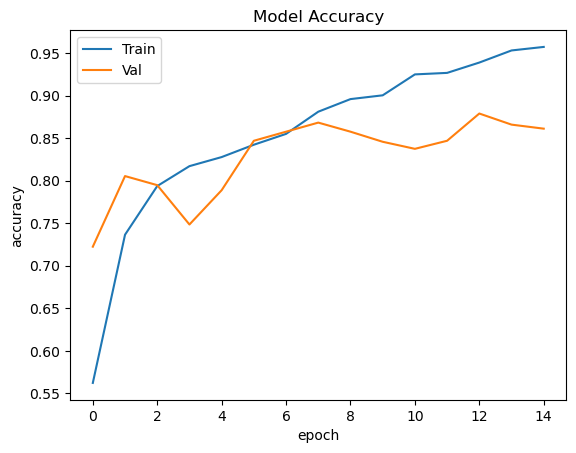

In [24]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

### Creating a plot of loss and validation loss for each epoch

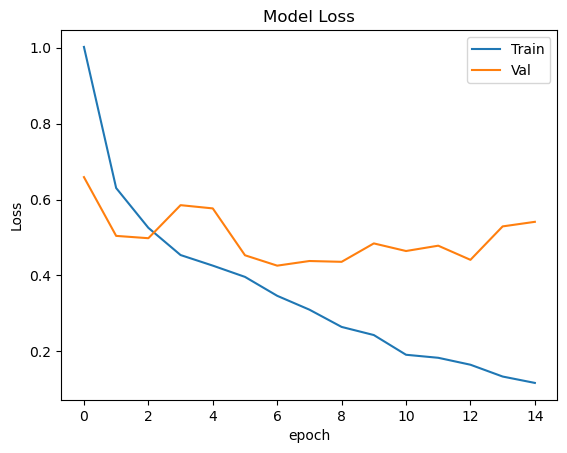

In [25]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'])
plt.show()

### Evaluating the model

In [26]:
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

27/27 [==============================] - 7s 268ms/step


### Generating classification report

In [29]:
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.83      0.91      0.87       190
diabetic_retinopathy       0.99      1.00      0.99       228
            glaucoma       0.76      0.76      0.76       200
              normal       0.85      0.77      0.81       225

            accuracy                           0.86       843
           macro avg       0.86      0.86      0.86       843
        weighted avg       0.86      0.86      0.86       843



### Saving the model

In [33]:
model.save("cnnkeras.h5")